## Performance de uma carteira de ativos

###### Importando as bibliotecas

In [24]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

###### Importando os dados

In [25]:
carteira = pd.read_excel('carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


###### Criando nosso Dataframe de Cotações dos ativos da carteira

In [26]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
  cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start='2020-01-01', end='2020-11-10', progress=False)['Adj Close']
  
display(cotacoes_carteira)


1 Failed download:
- GNDI3.SA: No timezone found, symbol may be delisted


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.539322,33.930641,10.9650,17.323145,17.714905,NaN,38.093487,111.485641,138.026352,184.888397,NaN
2020-01-03,113.800003,140.899994,11.922435,24.551737,33.573753,11.0675,17.783207,17.766314,NaN,40.747009,112.819687,136.173676,184.888397,NaN
2020-01-06,112.589996,139.100006,11.932189,24.113201,33.074108,11.3500,17.848871,17.740610,NaN,39.882378,111.936218,137.618774,183.387787,NaN
2020-01-07,112.239998,139.399994,11.898048,23.694294,32.306828,11.2650,17.813246,17.811386,NaN,40.528366,112.086418,133.237152,184.101044,NaN
2020-01-08,111.949997,138.199997,12.263843,23.327755,31.780430,11.2125,17.902309,17.653538,NaN,40.737072,110.054428,129.198257,173.680252,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.158897,21.936380,13.8050,16.129890,16.902939,NaN,46.143505,94.964668,115.979210,146.650970,116.904793
2020-11-04,94.160004,112.000000,26.143793,15.048995,22.812370,14.4000,16.512875,17.820778,NaN,47.375851,94.973518,117.618874,146.706543,117.042328
2020-11-05,96.949997,115.900002,27.401571,15.281863,23.350748,14.6775,17.474794,18.608175,NaN,49.969746,94.973518,118.925003,146.521255,117.317360


###### Validando as informações geradas

In [28]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   0 non-null      float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  109 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


###### Ajustando os dados validados que estão como nulos

In [37]:
df_media = cotacoes_carteira.mean()
# cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.ffill()

#remover o ativo que não tem cotação
cotacoes_carteira = cotacoes_carteira.dropna(axis=1)

display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.539322,33.930641,10.9650,17.323145,17.714905,38.093487,111.485641,138.026352,184.888397,116.738502
2020-01-03,113.800003,140.899994,11.922435,24.551737,33.573753,11.0675,17.783207,17.766314,40.747009,112.819687,136.173676,184.888397,116.738502
2020-01-06,112.589996,139.100006,11.932189,24.113201,33.074108,11.3500,17.848871,17.740610,39.882378,111.936218,137.618774,183.387787,116.738502
2020-01-07,112.239998,139.399994,11.898048,23.694294,32.306828,11.2650,17.813246,17.811386,40.528366,112.086418,133.237152,184.101044,116.738502
2020-01-08,111.949997,138.199997,12.263843,23.327755,31.780430,11.2125,17.902309,17.653538,40.737072,110.054428,129.198257,173.680252,116.738502
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.158897,21.936380,13.8050,16.129890,16.902939,46.143505,94.964668,115.979210,146.650970,116.904793
2020-11-04,94.160004,112.000000,26.143793,15.048995,22.812370,14.4000,16.512875,17.820778,47.375851,94.973518,117.618874,146.706543,117.042328
2020-11-05,96.949997,115.900002,27.401571,15.281863,23.350748,14.6775,17.474794,18.608175,49.969746,94.973518,118.925003,146.521255,117.317360


###### Analisando a performance da carteira de forma individual para normalizar os dados

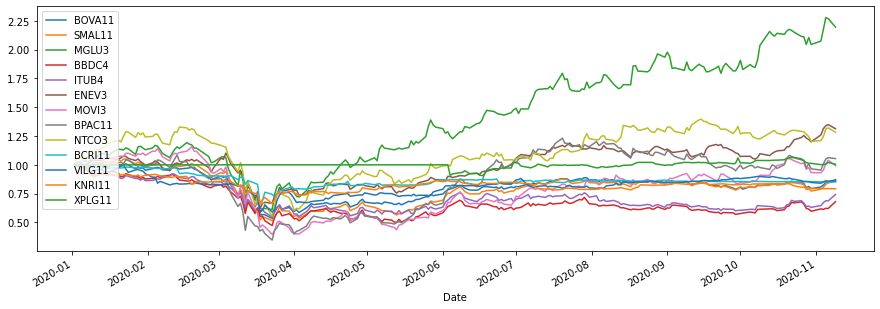

In [39]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15,5))
plt.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

### Criando um dataframe da Carteira com as quantidades de ações

### Comparação Carteira x IBOV

### Correlação da Carteira com o IBOV